## Experiment 1 - a single good with fixed odds.

__Basic Setup__:

First things first, we consider the simplest situation where a cafe sells only one product (say X). We further assume that every customer always uses the app if it's available. 

- $p = \text{price of one X} = 3.5\$$
- $r = \text{raw cost of one X} = 0.8\$ $

(Source: http://www.cafe-coach.com.au/the-secret-to-real-profits-in-a-cup-of-coffee/)

We define the following variables:
- $N = \text{average number of customers per day}$
- $N_{app} = \text{average number of customers with the app per day}$
- $d_W = \text{discount rate of winning}$,  $q_W = \text{probability of winning}$ 
- $d_L = \text{discount rate of losing}$,   $q_L = \text{probability of losing}$ 

Note. Here, discount rate is defined as the ratio of the discounted price with respect to the original price $p$. Hence, if you win a gamble, you can purchase a good X for price $q_W\cdot p$ and if you lose, you get it for $q_L\cdot p$. So, for instance, if you use the app with parameters $d_W = 0.6, q_W = 0.2, d_L = 0.9, q_L = 0.8$, then you win 40% discount off the price $p$ with probability 20% but only 10% off with the remaining probability.    

For the time being we assume that results of a gamble is binary (win or lose), and thus $q_W + q_L = 1$. Also, for the shop to make profits with the discounts, we need to make sure the discounted prices $d_{W}p$ and $d_{L}p$ are above the raw cost $r = 0.8\$$. Also, you should expect better discount rates when you win than when you lose. So, in summary we have:

$$ \frac{r}{p}\approx 0.22857 < d_W < d_L < 1.$$


__Simulation 1__:

Given the above setup, we will look at how much we need to increase the average number of customers to achieve a desired profit increase. The daily expected profit without the app is given by: $$DEP := N\cdot (p-r).$$ 

Similarly, assuming every customer uses the app after its introduction, the daily expected profit with the app can be computed as: $$DEP_{app}:=N_{app}\cdot \Big{[}q_{W}\cdot(d_{W}p - r) + (1-q_{W})\cdot(d_{L}p-r)\Big{]}.$$

Now, we would want the following to make money: $$ \alpha \cdot DEP < DEP_{app}$$ where $\alpha > 1$ adjusts the factor of desired increase in profits. To guarantee this happens, we at least need to increase the average number of customers by the factor of: $$ R(\alpha, d_{W},d_{L},q_{W},q_{L}) := \frac{\alpha(p-r)}{\Big{[}q_{W}\cdot(d_{W}p - r) + (1-q_{W})\cdot(d_{L}p-r)\Big{]}}$$


We can similarly model the conventional voucher system in which a fixed rate discount is guaranteed as the case where $d_{W} = d_{L}$. The following code plots $R$ as a function of discount rates $d_{W},d_{L}$ given the values of $\alpha$ and $q_w$. 

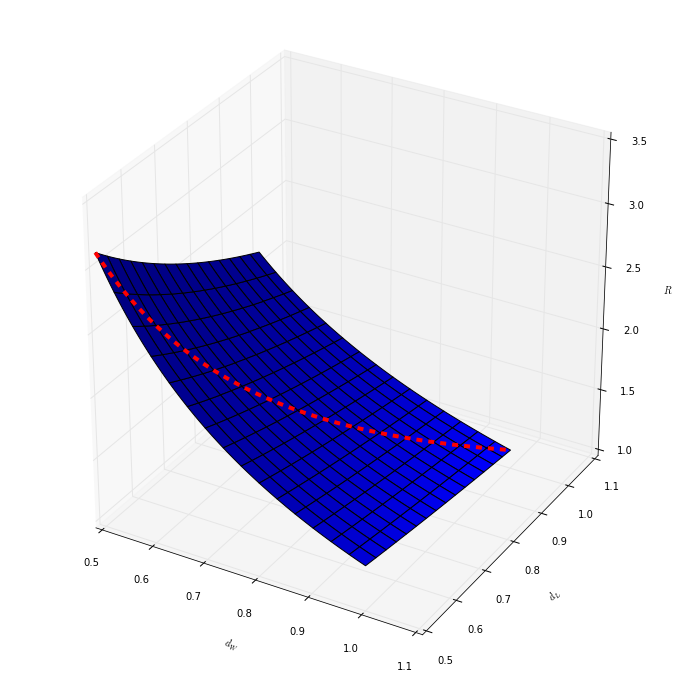

In [1]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
import random

#fixed parameters:
p = 3.5
r = 0.8
alpha = 1.1
q_w = 0.75

#define R:
def R(alpha,d_w, d_l,q_w):
  return alpha*(p-r)/(q_w*(d_w*p-r)+(1-q_w)*(d_l*p-r))

mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

Start = 0.5 #0.23
End = 1.0#1.0 
d_w = d_l = np.linspace(Start, End, 150)
D_W, D_L = np.meshgrid(d_w, d_l)
Rs = np.array([R(alpha,k1,k2,q_w) for k1,k2 in zip(np.ravel(D_W), np.ravel(D_L))])
#print 'Rs.shape:',Rs.shape
#print 'D_W.shape:', D_W.shape
R = Rs.reshape(D_W.shape)

r = alpha*(p-r)/(q_w*(d_w*p-r)+(1-q_w)*(d_l*p-r))
#print 'size of r:', r.size

ax.plot_surface(D_W, D_L, R)
ax.plot(d_w,d_l,r, color = "red", linestyle = 'dashed', linewidth = 4)

ax.set_xlabel('$d_W$')
ax.set_ylabel('$d_L$')
ax.set_zlabel('$R$')

plt.show()

Now, we look at how the set of possible discount plans $\{(d_w,d_l,q_w)\}$ varies with the target profit increase $\alpha$ and the rate of increase in the number of customers $R$ required to achieve that goal. In other words, we are interested in the following set:

$$ D_{\text{options}}(\alpha,R):= \{(d_w,d_l,q_w) : R(\alpha, d_{W},d_{L},q_{W}) = \frac{N_{fam}}{N}, \frac{r}{p}< d_W < d_L < 1\}$$

we plot the values of discount rates $d_w$ and $d_l$ for each value of $R$. 

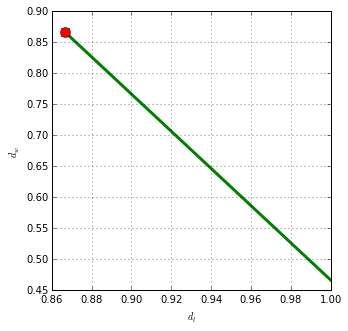

In [2]:
#fixed parameters: Suppose that you want to increase the profits by the factor of alpha >1 and, to do so, 
#you need to increase the number of customers by R. 

#The main idea: first set the goal on the profit increase, alpha, and decide on a manageble value of R. 
#Then, we should come up with a way to choose a 'good' discount plan (d_w,d_l,q_w) most attractive to customers. 

p = 3.5
r = 0.8
alpha = 1.1
R = 1.33 #R > alpha
q_w = 0.25

#find the dradients of the line: 
grad_l = -(1-q_w)/q_w
intcept_l = (alpha/R + r/p*(1-alpha/R))/q_w
Start = max(r/p, q_w*intcept_l)
End = min(1,(r/p - intcept_l)/grad_l)
d_l = np.linspace(Start, End, 200)
#print 'size of d_l:',d_l.size
d_w = grad_l*d_l + intcept_l
#print 'size of d_w:',d_w.size


#Plot the line
fig = plt.figure(figsize=(5,5))
axes = fig.add_subplot(111)
axes.plot(d_l,d_w,color = "green", linewidth = 3)

nogamble = q_w*intcept_l
axes.plot(nogamble,nogamble, marker='o',markerfacecolor='red',markersize = 10)
axes.set_title('')
axes.grid()
axes.set_xlabel('$d_l$')
axes.set_ylabel('$d_w$')
plt.show()


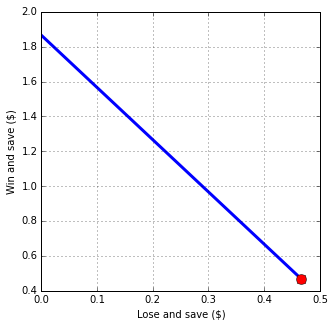

In [3]:
fig = plt.figure(figsize=(5,5))
axes = fig.add_subplot(111)
d_l_dollar = p*(1-d_l)
d_w_dollar = p*(1-d_w)

axes.plot(d_l_dollar,d_w_dollar,color = "blue", linewidth = 3)
nogamble_dollar = p*(1 - q_w*intcept_l)
axes.plot(nogamble_dollar,nogamble_dollar, marker='o',markerfacecolor='red',markersize = 10)
axes.set_title('')
axes.grid()
axes.set_xlabel('Lose and save ($)')
axes.set_ylabel('Win and save ($)')
plt.show()

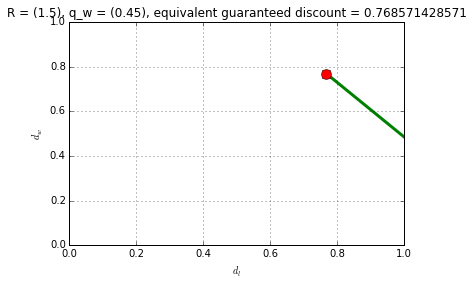

In [4]:
%matplotlib inline
import pylab as plt
import numpy as np
from IPython.html.widgets import interact
import math

def discount_rate(R, q_w):
    p = 3.5
    r = 0.8
    alpha = 1.05
    grad_l = -(1-q_w)/q_w
    intcept_l = (alpha/R + r/p*(1-alpha/R))/q_w
    Start = max(r/p, q_w*intcept_l)
    End = min(1,(r/p - intcept_l)/grad_l)
    d_l = np.linspace(Start, End, 200)
    d_w = grad_l*d_l + intcept_l
    plt.plot(d_l,d_w,'g',linewidth =3)
    nogamble = q_w*intcept_l
    plt.plot(nogamble,nogamble, marker='o',markerfacecolor='red',markersize = 10)
    
    plt.title("R = (%s), q_w = (%s), equivalent guaranteed discount = %s" %(R, q_w, nogamble) )
    plt.grid()
    plt.xlabel('$d_l$')
    plt.ylabel('$d_w$')  
    plt.ylim([0,1])
    plt.xlim([0,1])

interact(discount_rate, R=(1.1,2.0,0.05),q_w=(0.0,1.0,0.05)) 

<function __main__.discount_dollars>

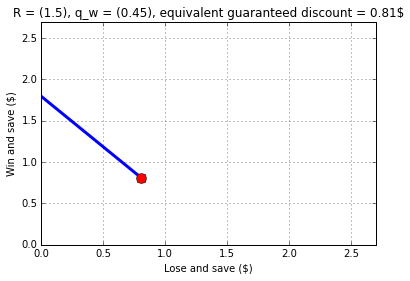

In [5]:
%matplotlib inline
import pylab as plt
import numpy as np
from IPython.html.widgets import interact
import math


def discount_dollars(R, q_w):
    p = 3.5
    r = 0.8
    alpha = 1.05
    grad_l = -(1-q_w)/q_w
    intcept_l = (alpha/R + r/p*(1-alpha/R))/q_w
    Start = max(r/p, q_w*intcept_l)
    End = min(1,(r/p - intcept_l)/grad_l)
    d_l = np.linspace(Start, End, 200)
    d_w = grad_l*d_l + intcept_l
    d_l_dollar = p*(1-d_l)
    d_w_dollar = p*(1-d_w)
    plt.plot(d_l_dollar, d_w_dollar,color = "blue", linewidth = 3)
    nogamble_dollar = p*(1 - q_w*intcept_l)
    plt.plot(nogamble_dollar,nogamble_dollar, marker='o',markerfacecolor='red',markersize = 10)
    
    plt.title("R = (%s), q_w = (%s), equivalent guaranteed discount = %s$" %(R, q_w, nogamble_dollar) )
    plt.xlabel('Lose and save ($)')
    plt.ylabel('Win and save ($)')
    plt.ylim([0,p-r])
    plt.xlim([0,p-r])
    plt.grid()
    #plt.axes([])    

interact(discount_dollars, R=(1.1,2.0,0.1),q_w=(0.0,1.0,0.05)) 

Limitations of the current model:
- We are considering the worst scenario in which every customer uses the app. The other extreme is that all customers $N$ before the app was introduced keep on coming but don't use the app

Interactive plot with python:
see http://moderndata.plot.ly/widgets-in-ipython-notebook-and-plotly/
see https://www.youtube.com/watch?v=wxVx54ax47s
see http://bokeh.pydata.org/en/latest/
